In [1]:
import pandas as pd
import os
import openpyxl
import matplotlib.pyplot as plt

In [2]:
from dataprocessing import process_and_clean_data
dataframes = process_and_clean_data()

FIle Paths==> Datasets/2019-29/education.xlsx Datasets/2023-33/education.xlsx Datasets/2019-29/occupation.xlsx
Datasets/2019-29/education.xlsx
Datasets/2019-29/education.xlsx
Datasets/2019-29/education.xlsx
Datasets/2023-33/education.xlsx
Datasets/2023-33/education.xlsx
Datasets/2023-33/education.xlsx
Datasets/2023-33/education.xlsx
Datasets/2019-29/occupation.xlsx


In [3]:
table_5_1 = dataframes["education_51_2333"]
table_5_2 = dataframes["education_52_2333"]
table_5_3 = dataframes["education_53_2333"]
table_5_4 = dataframes["education_54_2333"]

In [15]:
table_5_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Educational attainment            8 non-null      object 
 1   Median usual weekly earnings ($)  8 non-null      int64  
 2   Unemployment rate (%)             8 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 320.0+ bytes


In [4]:
# file_path2 = "2023-33/education.xlsx"
# # Postpandemic workbook
# post_pandemic_data = openpyxl.load_workbook(file_path2)

In [5]:
# table_5_1 = post_pandemic_data["Table 5.1"]
# table_5_2 = post_pandemic_data["Table 5.2"]
# table_5_3 = post_pandemic_data["Table 5.3"]
# table_5_4 = post_pandemic_data["Table 5.4"]

In [6]:
# The code provided defines two functions:
# # # Function to get and display column names
# # def get_column_names(df):
# #     print("Column Names:")
# #     column_names = df.columns.tolist()
# #     print(column_names)
# #     return column_names

# # # Function to get and display rows of a specific column
# # def get_specific_column_rows(df, column_name, num_rows=5):
# #     if column_name not in df.columns:
# #         print(f"Error: Column '{column_name}' not found in the DataFrame.")
# #         return
# #     print(f"\nRows for Column '{column_name}':")
# #     print(df[column_name].head(num_rows))


In [7]:
# def preprocess_table_and_title(df):
#     # Extract the title from the first row
#     table_title = df.iloc[0,0]  # Assuming the title is in the first cell
#     print(f"Table Title: {table_title}")
    
#     # Set the second row as column headers
#     df.columns = df.iloc[1]  # Use the second row as column headers
#     df = df[2:].reset_index(drop=True)  # Drop the first two rows
#     return table_title, df

# # Preprocess the tables (if necessary)
# table_5_1 = preprocess_table_and_title(table_5_1)

In [18]:
def processTable(df):
    # Output the title, assuming the title is in the first row of the DataFrame
    table_title = df.iloc[0, 0]  # First cell in the DataFrame
    print(f"Table Title: {table_title}")
    
    # Output the column names
    column_names = df.columns.tolist()
    print("Column Names:")
    print(column_names)
    
    # Output the data starting from the third row
    print("\nRow Data:")
    for index, row in df.iterrows():
        row_values = row.tolist()
        print(row_values)

# Process Table 5.1
processTable(table_5_1)


Table Title: Doctoral degree
Column Names:
['Educational attainment', 'Median usual weekly earnings ($)', 'Unemployment rate (%)']

Row Data:
['Doctoral degree', 2109, 1.6]
['Professional degree', 2206, 1.2]
["Master's degree", 1737, 2.0]
["Bachelor's degree", 1493, 2.2]
["Associate's degree", 1058, 2.7]
['Some college, no degree', 992, 3.3]
['High school diploma', 899, 3.9]
['Less than a high school diploma', 708, 5.6]


In [27]:
table_5_1

,Educational attainment,Median usual weekly earnings ($),Unemployment rate (%)
0,Doctoral degree,2109,1.6
1,Professional degree,2206,1.2
2,Master's degree,1737,2.0
3,Bachelor's degree,1493,2.2
4,Associate's degree,1058,2.7
5,"Some college, no degree",992,3.3
6,High school diploma,899,3.9
7,Less than a high school diploma,708,5.6


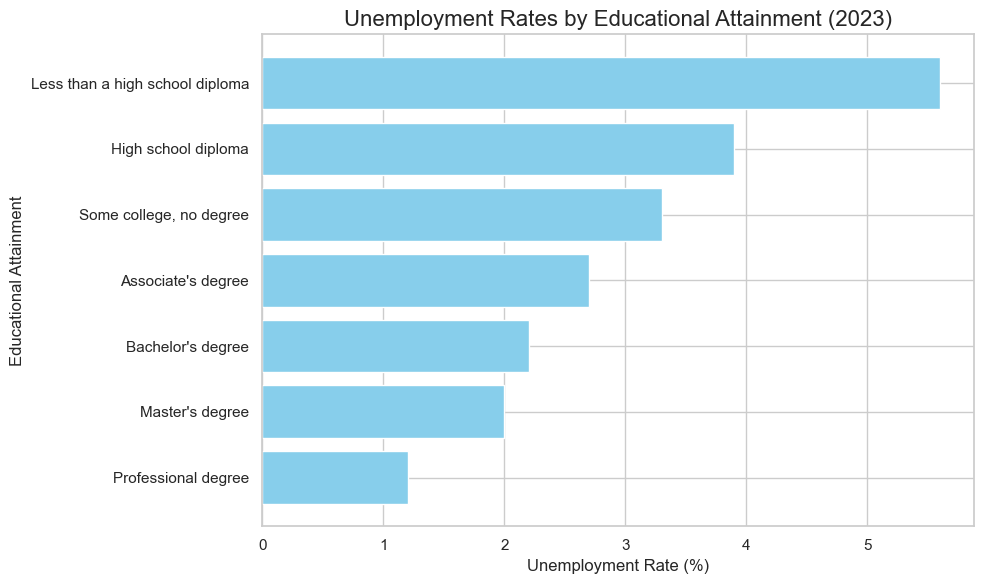

In [23]:
import seaborn as sns

columns = table_5_1.columns  # The first row contains column names
data = table_5_1[1:]    # The remaining rows are the actual data

df_table_5_1 = pd.DataFrame(data, columns=columns)

sns.set(style="whitegrid")

education = df_table_5_1['Educational attainment']
unemployment_rate = df_table_5_1['Unemployment rate (%)']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, unemployment_rate, color='skyblue')

# Add title and labels
plt.title("Unemployment Rates by Educational Attainment (2023)", fontsize=16)
plt.xlabel("Unemployment Rate (%)", fontsize=12)
plt.ylabel("Educational Attainment", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


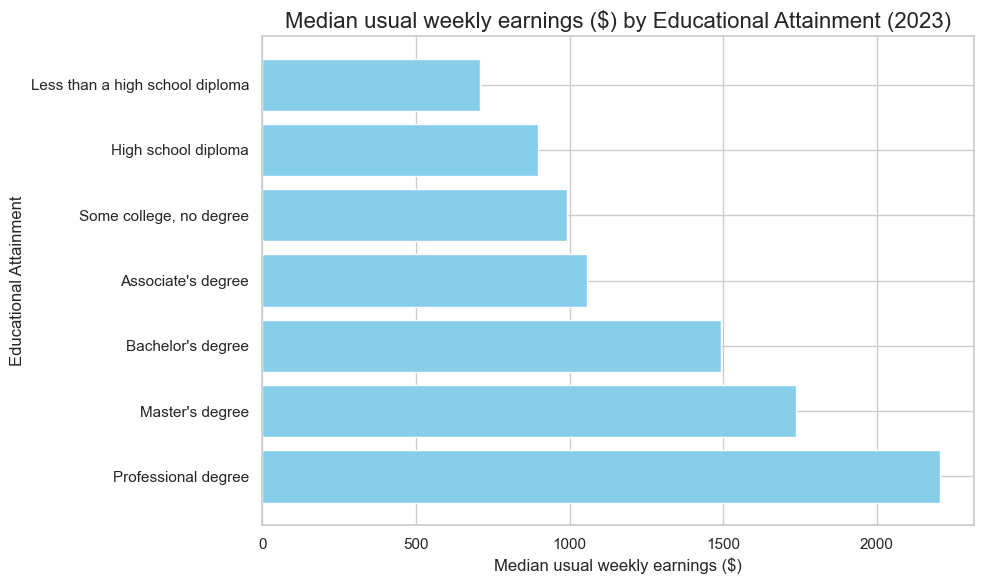

In [28]:
df_table_5_1 = pd.DataFrame(data, columns=columns)

sns.set(style="whitegrid")

education = df_table_5_1['Educational attainment']
unemployment_rate = df_table_5_1['Median usual weekly earnings ($)']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, unemployment_rate, color='skyblue')

# Add title and labels
plt.title("Median usual weekly earnings ($) by Educational Attainment (2023)", fontsize=16)
plt.xlabel("Median usual weekly earnings ($)", fontsize=12)
plt.ylabel("Educational Attainment", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
processTable(table_5_2)

Table Title: Total, all occupations
Column Names:
['Typical entry-level education', 'Employment, 2023', 'Employment, 2033', 'Employment distribution, percent, 2023', 'Employment distribution, percent, 2033', 'Numeric employment change, 2023-33', 'Percent employment change, 2023-33', 'Median annual wage, dollars, 2023[1]']

Row Data:
['Total, all occupations', 167849.8, 174589.0, 100.0, 100.0, 6739.2, 4.0, 48060]
['  Doctoral or professional degree', 4486.5, 4804.6, 2.7, 2.8, 318.1, 7.1, 124550]
["  Master's degree", 3668.6, 4111.0, 2.2, 2.4, 442.4, 12.1, 79840]
["  Bachelor's degree", 41431.7, 44410.0, 24.7, 25.4, 2978.3, 7.2, 86460]
["  Associate's degree", 3438.3, 3653.7, 2.0, 2.1, 215.4, 6.3, 62180]
['  Postsecondary nondegree award', 10383.2, 11003.2, 6.2, 6.3, 620.0, 6.0, 47740]
['  Some college, no degree', 4241.4, 4170.5, 2.5, 2.4, -70.9, -1.7, 44130]
['  High school diploma or equivalent', 63066.5, 64648.7, 37.6, 37.0, 1582.1, 2.5, 45040]
['  No formal educational credential', 

In [33]:
# def extract_table5_2_data(sheet):
#     data = []
#     for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
#         row_values = [cell.value for cell in row]
#         # Skip metadata rows
#         if (
#             not row_values[0] or  # Skip rows with no label
#             row_values[0].startswith("Table") or  # Skip title row
#             row_values[0] in ("Footnotes:", "[1]") or  # Skip footnote rows
#             row_values[0].startswith("Note:") or  # Skip notes
#             row_values[0].startswith("Source:")  # Skip source
#         ):
#             continue
#         # Ensure all data rows have meaningful values
#         if row_values[1] is not None:
#             data.append(row_values)
#     return data

# # Extract relevant data
# processed_data2 = extract_table5_2_data(table_5_2)

# # Remove "Total, all occupations"
# filtered_data2 = [row for row in processed_data2 if row[0] != "Total, all occupations"]

In [34]:
columns2 = table_5_2.columns  # The first row contains column names
data2 = table_5_2[1:]    # The remaining rows are the actual data

df_table_5_2 = pd.DataFrame(data2, columns=columns2)


In [35]:
df_table_5_2

,Typical entry-level education,"Employment, 2023","Employment, 2033","Employment distribution, percent, 2023","Employment distribution, percent, 2033","Numeric employment change, 2023-33","Percent employment change, 2023-33","Median annual wage, dollars, 2023[1]"
1,Doctoral or professional degree,4486.5,4804.6,2.7,2.8,318.1,7.1,124550
2,Master's degree,3668.6,4111.0,2.2,2.4,442.4,12.1,79840
3,Bachelor's degree,41431.7,44410.0,24.7,25.4,2978.3,7.2,86460
4,Associate's degree,3438.3,3653.7,2.0,2.1,215.4,6.3,62180
5,Postsecondary nondegree award,10383.2,11003.2,6.2,6.3,620.0,6.0,47740
6,"Some college, no degree",4241.4,4170.5,2.5,2.4,-70.9,-1.7,44130
7,High school diploma or equivalent,63066.5,64648.7,37.6,37.0,1582.1,2.5,45040
8,No formal educational credential,37133.6,37787.4,22.1,21.6,653.8,1.8,34430


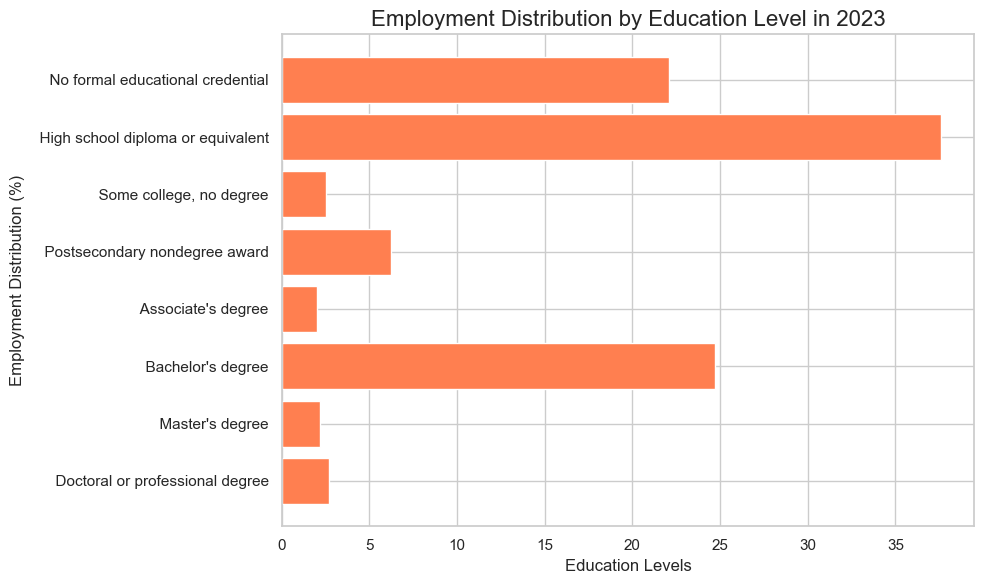

In [36]:
import seaborn as sns

sns.set(style="whitegrid")

education = df_table_5_2['Typical entry-level education']
empl_distb_2023 = df_table_5_2['Employment distribution, percent, 2023']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, empl_distb_2023, color='coral')

# Add title and labels
plt.title("Employment Distribution by Education Level in 2023", fontsize=16)
plt.xlabel("Education Levels", fontsize=12)
plt.ylabel("Employment Distribution (%)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

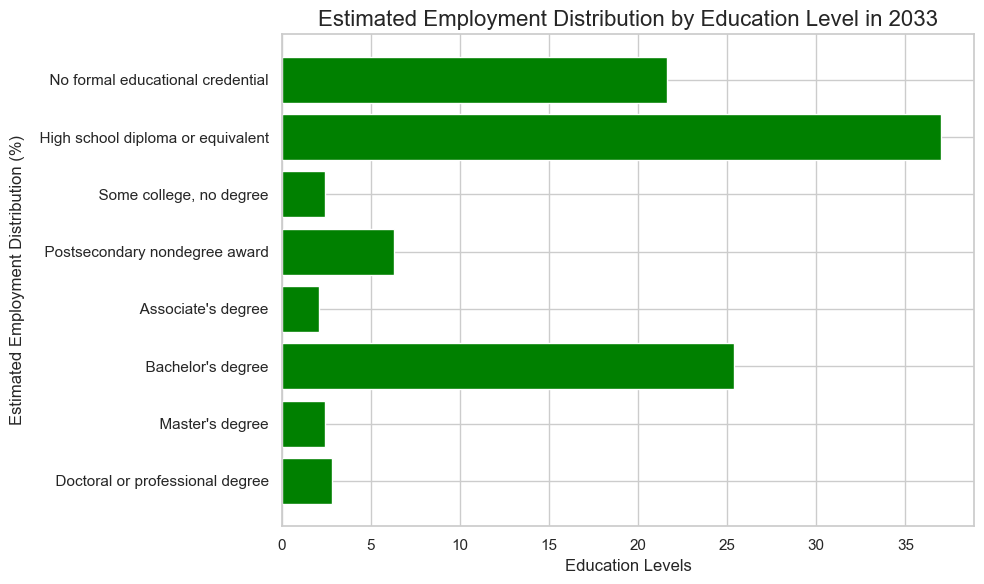

In [37]:
import seaborn as sns

sns.set(style="whitegrid")

education = df_table_5_2['Typical entry-level education']
empl_distb_2033 = df_table_5_2['Employment distribution, percent, 2033']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, empl_distb_2033, color='green')

# Add title and labels
plt.title("Estimated Employment Distribution by Education Level in 2033", fontsize=16)
plt.xlabel("Education Levels", fontsize=12)
plt.ylabel("Estimated Employment Distribution (%)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

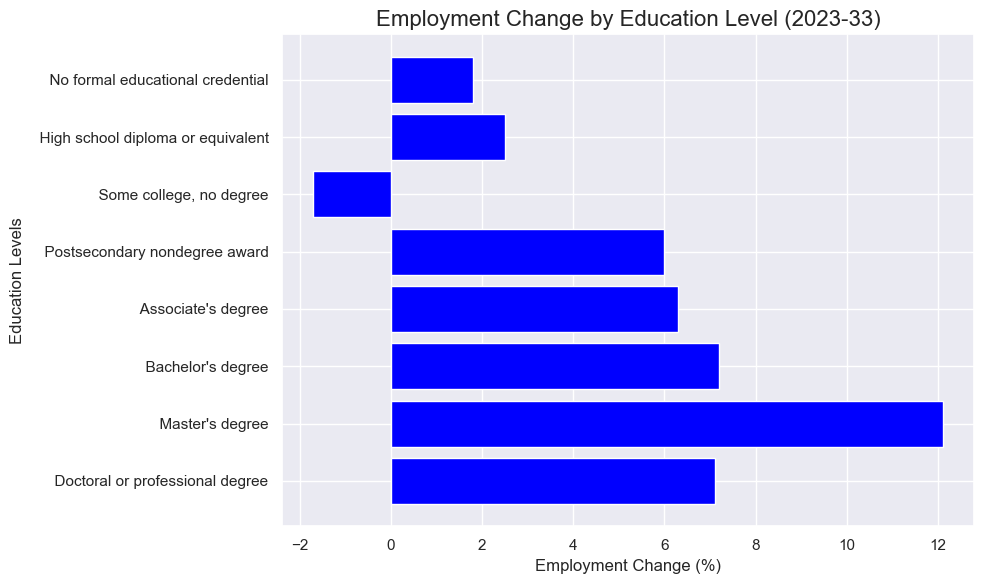

In [38]:
import seaborn as sns

sns.set(style="darkgrid")

education = df_table_5_2['Typical entry-level education']
empl_change = df_table_5_2['Percent employment change, 2023-33']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, empl_change, color='blue')

# Add title and labels
plt.title("Employment Change by Education Level (2023-33)", fontsize=16)
plt.ylabel("Education Levels", fontsize=12)
plt.xlabel("Employment Change (%)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

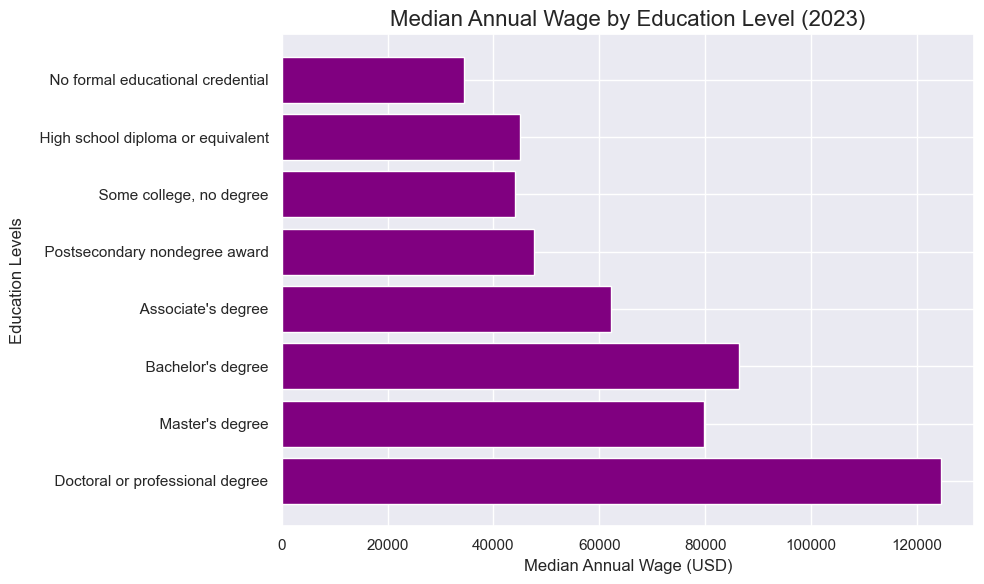

In [39]:
import seaborn as sns

sns.set(style="darkgrid")

education = df_table_5_2['Typical entry-level education']
empl_change = df_table_5_2['Median annual wage, dollars, 2023[1]']

# Create the plot
plt.figure(figsize=(10, 6))
plt.barh(education, empl_change, color='purple')

# Add title and labels
plt.title("Median Annual Wage by Education Level (2023)", fontsize=16)
plt.ylabel("Education Levels", fontsize=12)
plt.xlabel("Median Annual Wage (USD)", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
processTable(table_5_3)

Table Title: Total, all occupations
Column Names:
['2023 National Employment Matrix title', '2023 National Employment Matrix code', 'Less than high school diploma', 'High school diploma or equivalent', 'Some college, no degree', "Associate's degree", "Bachelor's degree", "Master's degree", 'Doctoral or professional degree', 'lables', 'Title Labels']

Row Data:
['Total, all occupations', '00-0000', 7.4, 22.6, 18.9, 9.5, 25.1, 11.7, 4.8, '11', 'Management occupations']
['Chief executives', '11-1011', 1.6, 7.9, 13.7, 5.2, 40.0, 24.7, 6.9, '11', 'Management occupations']
['General and operations managers', '11-1021', 3.2, 17.5, 23.5, 9.9, 32.7, 11.5, 1.6, '11', 'Management occupations']
['Legislators', '11-1031', 1.6, 7.9, 13.7, 5.2, 40.0, 24.7, 6.9, '11', 'Management occupations']
['Advertising and promotions managers', '11-2011', 1.0, 4.2, 7.8, 5.2, 65.2, 15.2, 1.4, '11', 'Management occupations']
['Marketing managers', '11-2021', 0.7, 3.7, 7.9, 4.2, 57.7, 23.8, 2.1, '11', 'Management oc

In [43]:
table_5_3

,2023 National Employment Matrix title,2023 National Employment Matrix code,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree,lables,Title Labels
0,"Total, all occupations",00-0000,7.4,22.6,18.9,9.5,25.1,11.7,4.8,11,Management occupations
1,Chief executives,11-1011,1.6,7.9,13.7,5.2,40.0,24.7,6.9,11,Management occupations
2,General and operations managers,11-1021,3.2,17.5,23.5,9.9,32.7,11.5,1.6,11,Management occupations
3,Legislators,11-1031,1.6,7.9,13.7,5.2,40.0,24.7,6.9,11,Management occupations
4,Advertising and promotions managers,11-2011,1.0,4.2,7.8,5.2,65.2,15.2,1.4,11,Management occupations
...,...,...,...,...,...,...,...,...,...,...,...
828,"Pump operators, except wellhead pumpers",53-7072,14.0,45.1,25.5,6.8,7.8,0.7,0.2,53,Transportation and material moving occupations
829,Wellhead pumpers,53-7073,14.0,45.1,25.5,6.8,7.8,0.7,0.2,53,Transportation and material moving occupations
830,Refuse and recyclable material collectors,53-7081,25.2,48.8,16.1,3.7,5.2,0.7,0.4,53,Transportation and material moving occupations
831,"Tank car, truck, and ship loaders",53-7121,14.4,51.5,19.8,6.4,6.6,1.0,0.4,53,Transportation and material moving occupations


In [45]:
def extract_total_occupation_data(df):
    """
    Extracts the row corresponding to "Total, all occupations" and returns the relevant data.

    Parameters:
        df (DataFrame): Pandas DataFrame containing the data.

    Returns:
        list: Row data starting from the 3rd column (index 2).
    """
    # Locate the row with "Total, all occupations" in the first column
    row = df[df.iloc[:, 0] == "Total, all occupations"]
    if not row.empty:
        # Return the values starting from the 3rd column (index 2)
        return row.iloc[0, 2:].tolist()
    else:
        print('"Total, all occupations" not found in the DataFrame.')
        return None

# Extracting data
total_occupation_data = extract_total_occupation_data(table_5_3)

# Education levels corresponding to the data
education_levels = [
    "Less than high school diploma",
    "High school diploma or equivalent",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Master's degree",
    "Doctoral or professional degree",
]

# Print the result
print("Total Occupation Data:", total_occupation_data)


Total Occupation Data: [7.4, 22.6, 18.9, 9.5, 25.1, 11.7, 4.8, '11', 'Management occupations']


In [47]:
print(f"Length of education_levels: {len(education_levels)}")
print(f"Length of total_occupation_data: {len(total_occupation_data)}")


Length of education_levels: 7
Length of total_occupation_data: 9


In [48]:
total_occupation_data = total_occupation_data[:len(education_levels)]


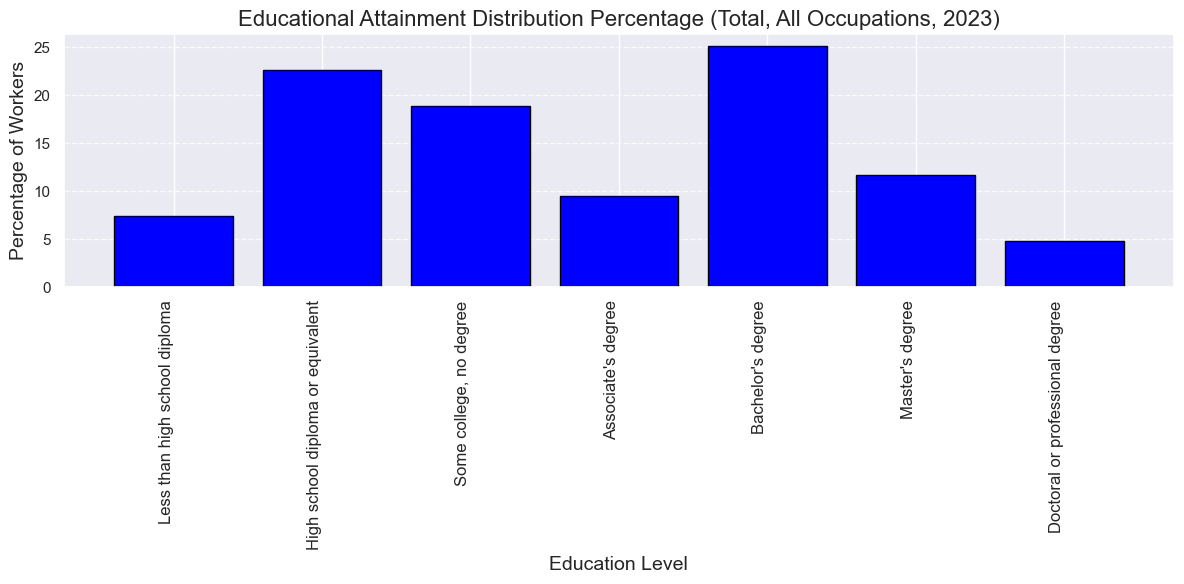

In [49]:
plt.figure(figsize=(12, 6))
plt.bar(education_levels, total_occupation_data, color='blue', edgecolor='black')
plt.title("Educational Attainment Distribution Percentage (Total, All Occupations, 2023)", fontsize=16)
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Percentage of Workers", fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [50]:
processTable(table_5_4)

Table Title: Chief executives
Column Names:
['2023 National Employment Matrix title', '2023 National Employment Matrix code', 'Typical education needed for entry', 'Work experience in a related occupation', 'Typical on-the-job training needed to attain competency in the occupation', 'xlsx_ooh_link', 'lables', 'Title Labels']

Row Data:
['Chief executives', '11-1011', "Bachelor's degree", '5 years or more', nan, 'OOH Content', '11', 'Management occupations']
['General and operations managers', '11-1021', "Bachelor's degree", '5 years or more', nan, 'OOH Content', '11', 'Management occupations']
['Legislators', '11-1031', "Bachelor's degree", 'Less than 5 years', nan, '—', '11', 'Management occupations']
['Advertising and promotions managers', '11-2011', "Bachelor's degree", 'Less than 5 years', nan, 'OOH Content', '11', 'Management occupations']
['Marketing managers', '11-2021', "Bachelor's degree", '5 years or more', nan, 'OOH Content', '11', 'Management occupations']
['Sales managers'

In [ ]:
# def extract_table5_4_data_(sheet):
#     data = []
#     for row in sheet.iter_rows(min_row=1, max_row=sheet.max_row, min_col=1, max_col=sheet.max_column):
#         row_values = [cell.value for cell in row]
#         # Skip metadata rows
#         if (
#             not row_values[0] or  # Skip rows with no label
#             row_values[0].startswith("Table") or  # Skip title row
#             row_values[0] in ("Footnotes:", "[1]") or  # Skip footnote rows
#             row_values[0].startswith("Note:") or  # Skip notes
#             row_values[0].startswith("Source:")  # Skip source
#         ):
#             continue
#         # Ensure all data rows have meaningful values
#         if row_values[1] is not None:
#             data.append(row_values)
#     return data

# # Extract relevant data
# data_table_5_4 = extract_table5_4_data_(table_5_4)

In [51]:
columns4 = table_5_4.columns  # The first row contains column names
data4 = table_5_4[1:]    # The remaining rows are the actual data

df_table_5_4 = pd.DataFrame(data4, columns=columns4)


In [62]:
df_table_5_4

,2023 National Employment Matrix title,2023 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,xlsx_ooh_link,lables,Title Labels
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,NaN,OOH Content,11,Management occupations
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,NaN,—,11,Management occupations
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,NaN,OOH Content,11,Management occupations
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,NaN,OOH Content,11,Management occupations
5,Sales managers,11-2022,Bachelor's degree,Less than 5 years,NaN,OOH Content,11,Management occupations
...,...,...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",53-7072,High school diploma or equivalent,NaN,Moderate-term on-the-job training,—,53,Transportation and material moving occupations
828,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training,—,53,Transportation and material moving occupations
829,Refuse and recyclable material collectors,53-7081,No formal educational credential,NaN,Short-term on-the-job training,OOH Content,53,Transportation and material moving occupations
830,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,NaN,Short-term on-the-job training,—,53,Transportation and material moving occupations


In [ ]:
df_table_5_4.drop('xlsx_ooh_link', axis=1)
df_table_5_4.drop('2023 National Employment Matrix code', axis=1)

,2023 National Employment Matrix title,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,xlsx_ooh_link,lables,Title Labels
1,General and operations managers,Bachelor's degree,5 years or more,NaN,OOH Content,11,Management occupations
2,Legislators,Bachelor's degree,Less than 5 years,NaN,—,11,Management occupations
3,Advertising and promotions managers,Bachelor's degree,Less than 5 years,NaN,OOH Content,11,Management occupations
4,Marketing managers,Bachelor's degree,5 years or more,NaN,OOH Content,11,Management occupations
5,Sales managers,Bachelor's degree,Less than 5 years,NaN,OOH Content,11,Management occupations
...,...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",High school diploma or equivalent,NaN,Moderate-term on-the-job training,—,53,Transportation and material moving occupations
828,Wellhead pumpers,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training,—,53,Transportation and material moving occupations
829,Refuse and recyclable material collectors,No formal educational credential,NaN,Short-term on-the-job training,OOH Content,53,Transportation and material moving occupations
830,"Tank car, truck, and ship loaders",No formal educational credential,NaN,Short-term on-the-job training,—,53,Transportation and material moving occupations


In [64]:
education_levels = [
    "No formal educational credential",
    "High school diploma or equivalent",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Master's degree",
    "Doctoral or professional degree",
]
education_counts = df_table_5_4['Typical education needed for entry'].value_counts()

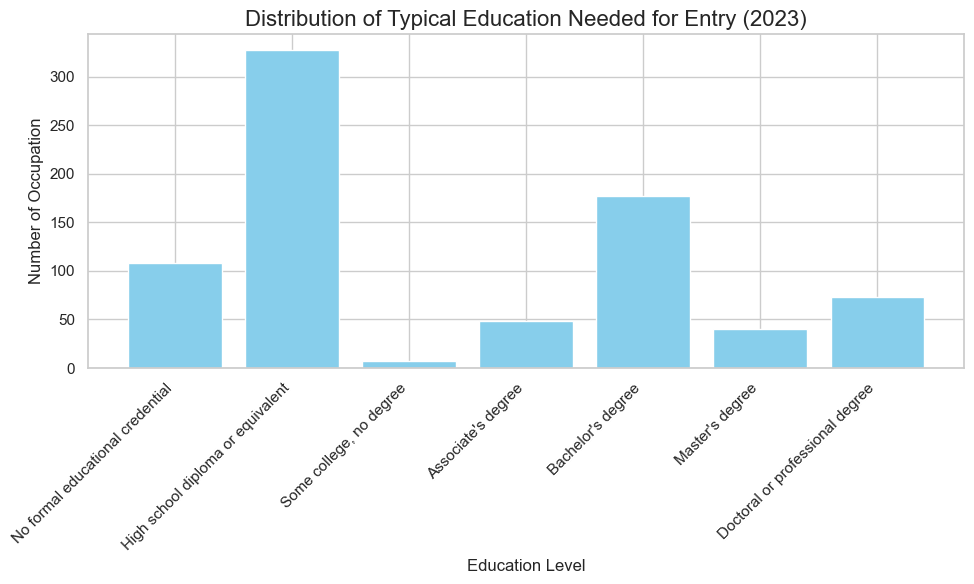

In [65]:
education_counts = education_counts.reindex(education_levels, fill_value=0)

# Plotting the distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Barplot for the education level distribution
plt.bar(education_counts.index, education_counts.values, color='skyblue')

# Title and labels
plt.title("Distribution of Typical Education Needed for Entry (2023)", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Number of Occupation", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

In [69]:
df_table_5_4

,2023 National Employment Matrix title,2023 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation,xlsx_ooh_link,lables,Title Labels
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,NaN,OOH Content,11,Management occupations
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,NaN,—,11,Management occupations
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,NaN,OOH Content,11,Management occupations
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,NaN,OOH Content,11,Management occupations
5,Sales managers,11-2022,Bachelor's degree,Less than 5 years,NaN,OOH Content,11,Management occupations
...,...,...,...,...,...,...,...,...
827,"Pump operators, except wellhead pumpers",53-7072,High school diploma or equivalent,NaN,Moderate-term on-the-job training,—,53,Transportation and material moving occupations
828,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training,—,53,Transportation and material moving occupations
829,Refuse and recyclable material collectors,53-7081,No formal educational credential,NaN,Short-term on-the-job training,OOH Content,53,Transportation and material moving occupations
830,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,NaN,Short-term on-the-job training,—,53,Transportation and material moving occupations


In [ ]:
# df_table_5_4['Work experience in a related occupation'] = (
#     df_table_5_4['Work experience in a related occupation'].str.strip()
# )


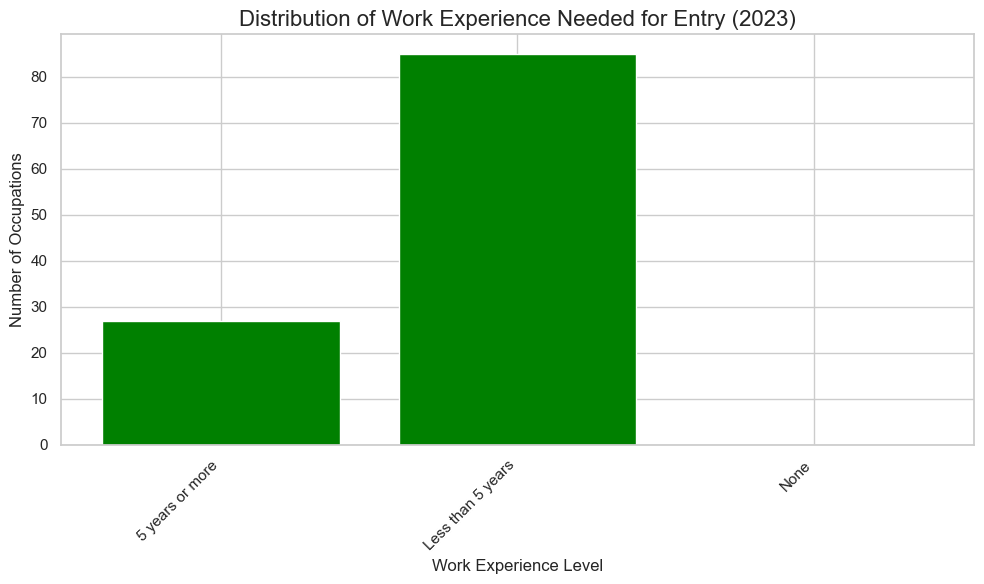

In [73]:
# Ensure work_exp matches the expected categories in the column
work_exp = ['5 years or more', 'Less than 5 years', 'None']

# Count occurrences in the "Work experience in a related occupation" column
work_counts = df_table_5_4['Work experience in a related occupation'].value_counts()

# Reindex to match the order of work_exp, filling missing values with 0
workexp_counts = work_counts.reindex(work_exp, fill_value=0)

# Plotting the distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Barplot for the work experience distribution
plt.bar(workexp_counts.index, workexp_counts.values, color='green')

# Add title and labels
plt.title("Distribution of Work Experience Needed for Entry (2023)", fontsize=16)
plt.xlabel("Work Experience Level", fontsize=12)
plt.ylabel("Number of Occupations", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


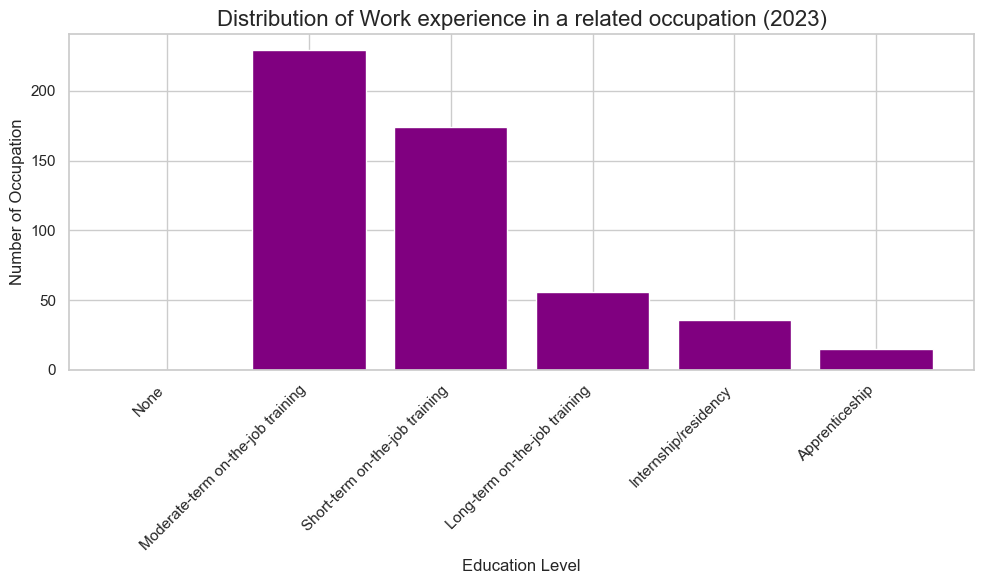

In [74]:
taining_levels = ['None',
            'Moderate-term on-the-job training',
            'Short-term on-the-job training',
            'Long-term on-the-job training',
            'Internship/residency',
            'Apprenticeship']

train_c = df_table_5_4['Typical on-the-job training needed to attain competency in the occupation'].value_counts()

training_counts = train_c.reindex(taining_levels, fill_value=0)

# Plotting the distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Barplot for the education level distribution
plt.bar(training_counts.index, training_counts.values, color='purple')

# Title and labels
plt.title("Distribution of Work experience in a related occupation (2023)", fontsize=16)
plt.xlabel("Education Level", fontsize=12)
plt.ylabel("Number of Occupation", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()